This notebook will look into various Python based machine learning and data science libraries in an attempt to build
a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

#### The dependant variable (to be predicted) will be the target column.

## 1. Problem Definaition
Given clinical parameters about a patient, can we predict whether or not they have heart disease?
This is a classification problem.

## 2. Data
The original data came from the Cleveland data UCI Machine Learning Repository.

## 3. Evaluation
If we can reach 95% accuracy, then we will persue the project.

## 4. Features
This is where you will get different information about each of the features in your data.
Create a data dictionary.

In [1]:
#Import the libraries

#EDA (exploratory data analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load dataset
df = pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

### Exploratory Data Analysis (EDA)

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Check for missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Find info on 'target' column (1=Yes, 0=No)

df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

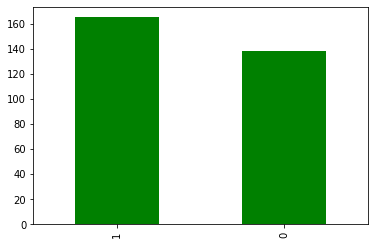

In [7]:
#Visualise the target column
df['target'].value_counts().plot(kind='bar', color='green');

#This is a balanced classification problem

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Searching For Patterns in the data

1. Analyse how independent variables relate to the dependant variable

In [93]:
#Target column v'Sex column

#1=Male 0=Female (sex)
#1=Yes  0=No     (target)

df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


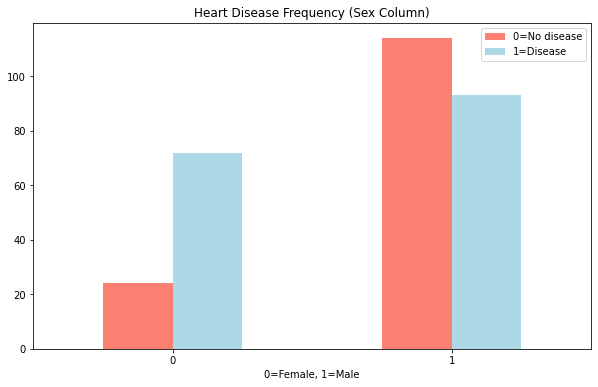

In [11]:
pd.crosstab(df['sex'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency (Sex Column)')
plt.xlabel('0=Female, 1=Male')
plt.legend(['0=No disease', '1=Disease'])
plt.xticks(rotation=0);

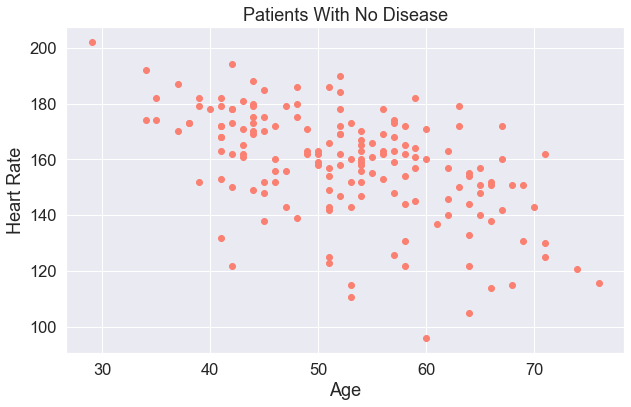

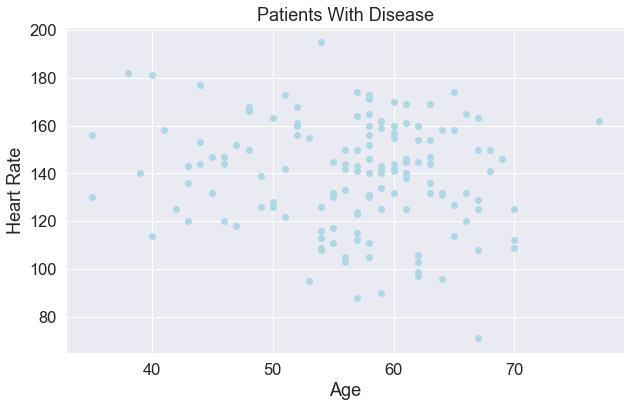

In [94]:
#Target column v's Age column v's Max heart rate

#1=Yes  0=No     (target)

plt.figure(figsize=(10,6)) 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= 'salmon')
plt.title('Patients With No Disease')
plt.xlabel('Age')
plt.ylabel('Heart Rate')

plt.figure(figsize=(10,6)) 
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= 'lightblue')
plt.title('Patients With Disease')
plt.xlabel('Age')
plt.ylabel('Heart Rate');

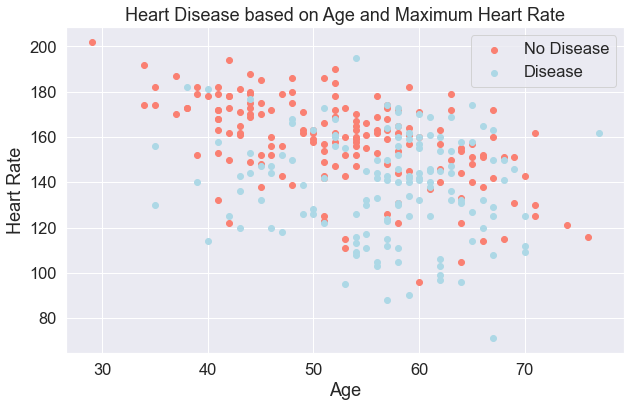

In [95]:
#Target column v's Age column v's Max heart rate

#1=Yes  0=No     (target)

plt.figure(figsize=(10,6)) 
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c= 'salmon')


plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c= 'lightblue');

plt.title('Heart Disease based on Age and Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.legend(['No Disease', 'Disease']);

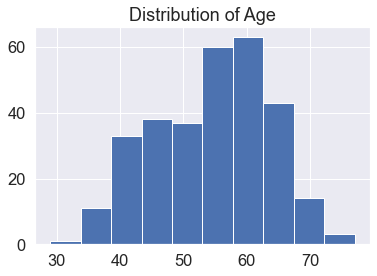

In [96]:
# Analyse the distribution of the 'Age' column

df['age'].hist().plot()
plt.title('Distribution of Age');

In [15]:
#Target column v's Chest Pai column v's Max heart rate
#1=Yes  0=No     (target)

#0=Typical angina - chest pain related. Decrease blood supply to the heart.
#1=Atypical angina - chest pain not realted to the heart
#2=Non anginal pain - typical esophageal spasms. Non heart related.
#3=Asymptomatic - chest pain not showing signs of disease

df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [16]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


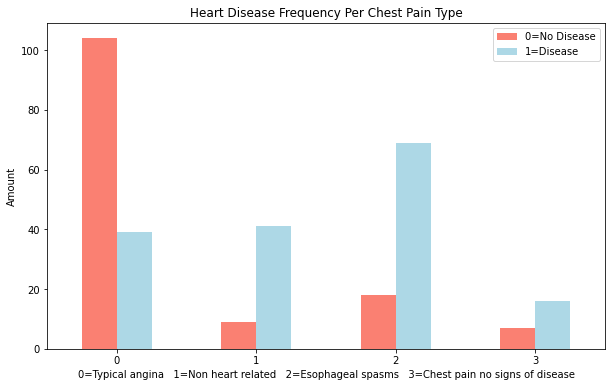

In [17]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])
plt.xlabel('0=Typical angina   1=Non heart related   2=Esophageal spasms   3=Chest pain no signs of disease')
plt.ylabel('Amount')
plt.xticks(rotation=0)
plt.legend(['0=No Disease', '1=Disease'])
plt.title('Heart Disease Frequency Per Chest Pain Type');

#The data shows a positive correlation between the two variables.

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
#Building a correlation matrix to analyse how the independant columns relate to eachother

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


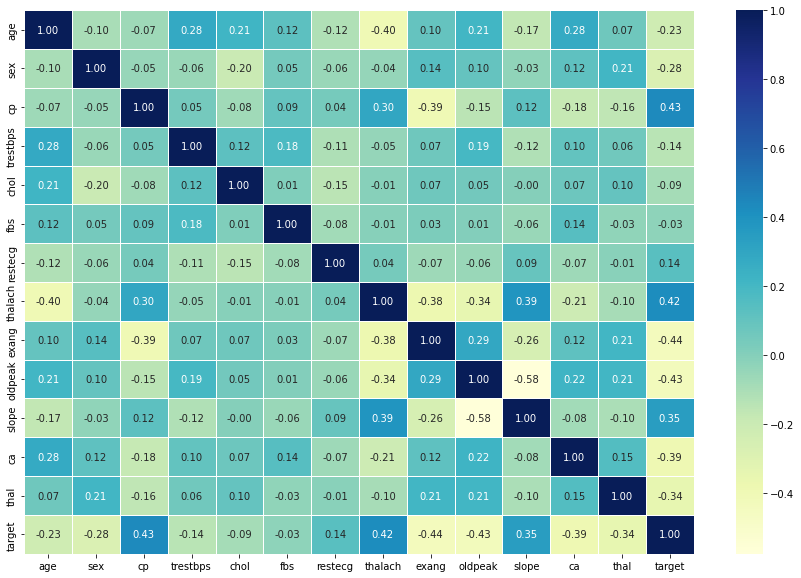

In [20]:
#Analysing correlation matrix in a heatmap

#Positive correlation = a relationship between 2 variables where both variables increase in correlation
#Negative correlation = a relationship between 2 variables where one variable increase and the other decreases. 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt='.2f', cmap='YlGnBu');

#CP and target are positively correlated - as chest pain type increases, the chances of getting heart disease (1) has increased.
#exang and target are negatively correlated - as chest pain during exercise goes down, the chance of getting heart disease goes up.

In [40]:
# Analyse the correlation of each feature

corr_pairs = corr_matrix.unstack()
corr_pairs

age     age         1.000000
        sex        -0.098447
        cp         -0.068653
        trestbps    0.279351
        chol        0.213678
                      ...   
target  oldpeak    -0.430696
        slope       0.345877
        ca         -0.391724
        thal       -0.344029
        target      1.000000
Length: 196, dtype: float64

In [21]:
#Exercise induced angina column v' Target column
#1=Yes  0=No     (target)
#1=Yes (do get angina during exercie) 0=No (don't get angina during exercise) (exang)

df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [22]:
pd.crosstab(df['exang'], df['target'])

target,0,1
exang,,
0,62,142
1,76,23


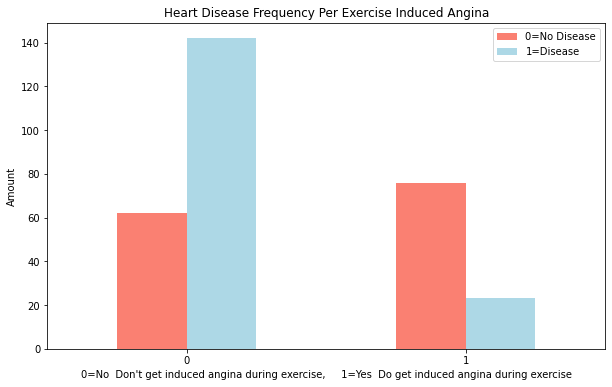

In [23]:
pd.crosstab(df['exang'], df['target']).plot(kind='bar', color=['salmon', 'lightblue'], figsize=(10,6))
plt.xticks(rotation=0)
plt.xlabel('0=No  Don\'t get induced angina during exercise,     1=Yes  Do get induced angina during exercise')
plt.ylabel('Amount')
plt.legend(['0=No Disease', '1=Disease'])
plt.title('Heart Disease Frequency Per Exercise Induced Angina');

#The data shows that he independant variables show a negative correlation.
#The data shows that pateients who do not experiance angina during exercise have a higher chance of getting heart disease.

### Modelling & Experimentation Phase

In [24]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
#Split data into features and labels

X = df.drop('target', axis=1)
y = df['target']

#Split into train and test set

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Trying out different machine learning models

1. Logistic Regression - a model for classification rather than regression
2. K-Nearest Neigbours Classifier
3. RandomForest Classifier

In [26]:
# Place models in a dictionary

models = {'Logistic Regression': LogisticRegression(), 
         'KNN': KNeighborsClassifier(),
         'Random Forest': RandomForestClassifier()}

#Create a function to fit, train and then evaluate them

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for kv, model in models.items():
        model.fit(X_train, y_train)
        model_scores[kv] = model.score(X_test, y_test)
    return model_scores

In [100]:
# Initiate function
model_scores = fit_and_score(models=models,
                              X_train=X_train,
                              X_test=X_test,
                              y_train=y_train,
                              y_test=y_test)

model_scores

C:\Users\gail_\Documents\Heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

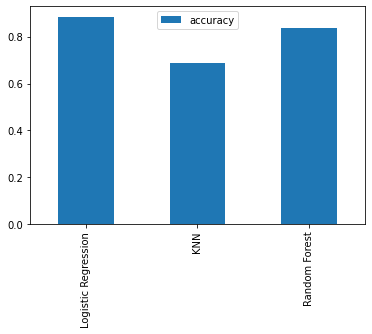

In [28]:
# Show model comparision results visually - baseline predictions

model_comparision = pd.DataFrame(model_scores, index=['accuracy'])
model_comparision.T.plot.bar();

#### Improving model performance with standard proceedures

1. Hyperparamater tuning
2. Feature importance

#### Improving classification models

3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 score
8. Classification Report
9. ROC curve
10 Area under the curve (AUC)

Maximum KNN score on the test data:  75.41%


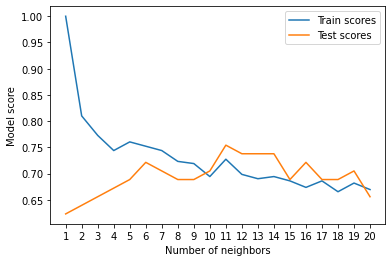

In [29]:
#1. Hyperparameter tuning - KNN

train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

plt.plot(neighbors, train_scores, label='Train scores')
plt.plot(neighbors, test_scores, label='Test scores')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores) * 100: .2f}%')

#Number of neighbors of deafult 5 to 11 will improve this model from 68.5% to 75.4%.
#This model is still significantly under the performance benchmark of 95%, therefore the KNN model will be discarded for now.

In [101]:
#4. Hyperparameter tuning: LogosticRegression Model & RandomForestClassifier Model Using RandomizedSearchCV

LR_grid = {'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear']}

RF_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2), 
           'min_samples_leaf': np.arange(1, 20, 2)}

In [31]:
# Tune LogigisticsRegression

np.random.seed(42)

log_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=LR_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
log_reg.score(X_test, y_test)

0.8852459016393442

In [34]:
# Tune RandomForestClassifier

np.random.seed(42)

log_RF = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=RF_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True)

log_RF.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
log_RF.score(X_test, y_test)

0.8688524590163934

In [36]:
log_RF.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
#Hyperparameter tuning: LogosticRegression Model Using GridSearchCV

LR_grid = {'C': np.logspace(-4, 4, 30),
        'solver': ['liblinear']}

np.random.seed(42)

log_F = GridSearchCV(LogisticRegression(),
                            param_grid=LR_grid,
                            cv=5,
                            verbose=True)

log_F.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [38]:
log_F.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [39]:
log_F.score(X_test, y_test)

0.8852459016393442

#### Evaluating The Tuned Logostics Regression Model

Use the LogisticsRegression model with it's best hyperparameters (that we found using GridSearch) to get further metrics.

* ROC Curve and AUC Score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1 Score

To make comparisions and evaluate our trained model, we first need to make predictions.

In [41]:
# Make predictions with tuned model

y_preds = log_F.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

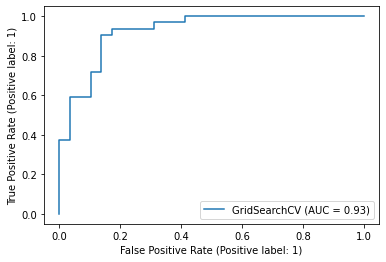

In [43]:
# Compare to truth labels
# Plot ROC curve and calculate AUC metric.

plot_roc_curve(log_F, X_test, y_test);

In [44]:
# Confusion matrix

print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


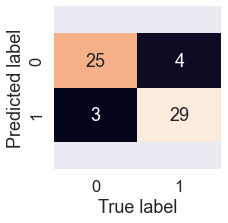

In [51]:
# Plot confusion matrix

sns.set(font_scale=1.5)

def conf_matrix(y_test, y_preds):
    """
    will plot a confusion matrix using seaborn's heatmap
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
conf_matrix(y_test, y_preds)    

# Analysis shows that there are 4 occasions when the model predicted that someone didn't have heart diseasewhen they did.

# Analysis shows that there were 3 occasions when the model perdicted that someone did have heart disease when they didn't.

In [53]:
# Classification Report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [54]:
# Calculate evaluation metrics using cross validation (instead of train, test & split)

# Check best hyperparameters
log_F.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [56]:
# Create a new classifier with the best parameters

clf = LogisticRegression(C=0.20433597178569418,
                         solver='liblinear')

In [61]:
#Cross-validated accuracy

cv_acc = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [64]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [68]:
# Cross-validated precision

cv_precision = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring='precision')

cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [71]:
# Cross-validated recall

cv_recall = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring='recall')

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [72]:
# Cross validate F1 f1

cv_f1 = cross_val_score(clf, 
                         X,
                         y,
                         cv=5,
                         scoring='f1')

cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

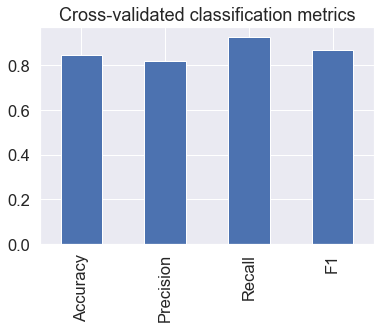

In [74]:
# Visualise the cross-validated metrics 

cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                           'Precision': cv_precision,
                           'Recall': cv_recall,
                           'F1': cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                     legend=False);

### Feature Importance

Which features contributed most to the outcome of the model and how did they contribute?
Feature importance is different for each machine learning model.

Find feature importance for the LogisticsRegression model.

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [80]:
# Fit an instance of LogisticRegression

log_F.best_params_

clf = LogisticRegression(C = 0.20433597178569418,
                         solver = 'liblinear')

clf.fit(X_train, y_train);

In [82]:
# Check coef_

clf.coef_

array([[ 0.00316728, -0.86044675,  0.66067032, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.5686279 ,
         0.45051633, -0.63609907, -0.67663375]])

In [84]:
# Match coef's of features to columns
# This shows you how much each feature contributes to the dependant column (target column)

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830677295966,
 'sex': -0.8604467464181768,
 'cp': 0.6606703196786501,
 'trestbps': -0.011569931725970527,
 'chol': -0.0016637456109837993,
 'fbs': 0.04386101205953376,
 'restecg': 0.3127586484717099,
 'thalach': 0.024593615841597527,
 'exang': -0.6041309444844618,
 'oldpeak': -0.5686278978594388,
 'slope': 0.45051632904765737,
 'ca': -0.6360990721560912,
 'thal': -0.67663374706138}

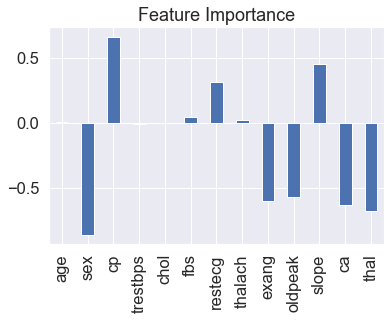

In [86]:
# Visualise the feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance', 
                      legend=False);

In [90]:
# The 'Sex' feature has a strong negative coefficient to the target column

pd.crosstab(df['sex'], df['target'])

# As 'Sex' increases, the 'target' ratio decreases. 

target,0,1
sex,,
0,24,72
1,114,93


In [92]:
# The 'slope' feature has a strong positive coefficient ot the target column

pd.crosstab(df['slope'], df['target'])

# As 'slope' increases, the target increases. 

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Notes

* Overall, the LogisticREgression model performed the best by achieving a score of 89%
* Hyperparameter tuning did not make an overall huge difference to the initial score.
* The 95% target metric was not met. However, the highest evaluation metric achieved was 93% (Recall).
* Could we collect more data?
* Could we try a better model other than the LogistRegression model? Look into CatBoost or XGBoost.
* Could we try and improve the existing models (using hyperparamter tuning) in addition to what has already been done?